# Visualization of bird sound files (spectral)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Utilities" data-toc-modified-id="Utilities-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Utilities</a></span></li><li><span><a href="#Load-files-and-compute-all-spectrums" data-toc-modified-id="Load-files-and-compute-all-spectrums-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load files and compute all spectrums</a></span></li><li><span><a href="#Blue-pipit-analysis" data-toc-modified-id="Blue-pipit-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Blue pipit analysis</a></span><ul class="toc-item"><li><span><a href="#Average-spectrum" data-toc-modified-id="Average-spectrum-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Average spectrum</a></span></li><li><span><a href="#Random-Blue-Pipit-spectrums" data-toc-modified-id="Random-Blue-Pipit-spectrums-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random Blue Pipit spectrums</a></span><ul class="toc-item"><li><span><a href="#For-the-&quot;songs&quot;" data-toc-modified-id="For-the-&quot;songs&quot;-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>For the "songs"</a></span></li><li><span><a href="#For-the-&quot;calls&quot;" data-toc-modified-id="For-the-&quot;calls&quot;-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>For the "calls"</a></span></li></ul></li></ul></li><li><span><a href="#Kasios-files" data-toc-modified-id="Kasios-files-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Kasios files</a></span></li><li><span><a href="#Analyse-a-specific-file" data-toc-modified-id="Analyse-a-specific-file-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analyse a specific file</a></span></li></ul></div>

In [1]:
from lib.File import File
from matplotlib import pyplot as plt
from data.loader import get_kasios_obs, get_obs, map_path
import numpy as np

from math import sqrt
import pandas as pd

## Utilities

In [2]:
def get_spectrums(df):   
    ###
    ### Generate the spectres for all files within the dataframe given (maintains the df index)
    ###
    
    N = df.shape[0]
    data = {} # Initialisation
    for i, (index, row) in enumerate(df.iterrows()):
        # Progression
        if i % 50 == 0:
            print("Computing spectrums... ({0:.0%})  ".format(i/N), end="\r")
        
        # Reading the file
        f = File(row["song"])
        spectre, freq = f.getNormalizedSpectre()
        
        
        if spectre is None:
            # Sometimes the spectre cannot be compute because there is too much noise
            continue
        
        # Adding the spectre
        data[index] = spectre
    
    # Building output dataframe
    X = pd.DataFrame.from_dict(data, columns = freq, orient = "index")
    X = X.reindex(df.index, fill_value = 0)
    
    print("All spectrums have been generated.       ")
    return X


def merge_spectres(spectres):
    ###
    ### Merge multiple spectres to one and normalize it.
    ###
    
    m_spectres = spectres.sum(axis = 0)
    m_spectres = (m_spectres - m_spectres.mean())/m_spectres.std()
    return m_spectres

# Plot only one species
def plot_species(species, spectres, df):
    # Parameter for the species
    species_spectres = spectres.loc[df.English_name == species]
    species_color = df.loc[df.English_name == species].color.iloc[0]
    
    plt.title(species)
    plt.plot(merge_spectres(species_spectres), color = species_color) # Merge all spectres together
    plt.xlabel("Fréquence (Hz)")

## Load files and compute all spectrums

In [3]:
# Loads files and makes conversion if necessary
df_all = get_obs(songs = True)
df_kasios = get_kasios_obs(songs = True)

Loading wav files...
Done.
Loading wav files...
Done.


In [4]:
# X = get_spectrums(df_all) # Can be very long
# X.to_pickle("data/all_birds_freq.pickle") # Save to cache
X = pd.read_pickle("data/all_birds_freq.pickle") # Quicker to use cache ;)

X.head()

,1900.0,1910.0,1920.0,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,...,5900.0,5910.0,5920.0,5930.0,5940.0,5950.0,5960.0,5970.0,5980.0,5990.0
File ID,,,,,,,,,,,,,,,,,,,,,
402254,-0.777891,-0.398350,-0.014216,-0.855008,2.075899,-0.221931,-0.655440,-1.191778,0.585549,0.236256,...,0.433391,0.306798,-1.075585,-0.452546,-0.197668,-0.996424,-0.379281,-0.244899,-0.400091,-0.611824
406171,-4.162661,-4.180349,-4.229848,-4.230835,-4.269890,-4.245544,-4.282711,-4.257561,-4.243178,-4.282526,...,-1.510778,-1.968467,-1.824303,-1.519034,-1.865900,-1.872201,-1.824038,-1.760304,-1.728515,-1.927553
405901,-0.580728,-0.633019,-0.707576,-0.645468,-0.603866,-0.725716,-0.672938,-0.657233,-0.662175,-0.732691,...,-0.300444,-0.458147,-0.586822,-0.149122,-0.337683,-0.258401,-0.292191,-0.543218,-0.267194,-0.134089
405548,-3.228091,-3.251748,-3.226915,-3.256686,-3.309930,-3.233574,-3.255813,-3.283560,-3.262860,-3.241711,...,7.121533,6.845443,6.915710,6.386549,5.541339,4.538464,2.270188,0.207980,1.365019,3.283181
401782,-3.740562,-3.741388,-3.765818,-3.748055,-3.741544,-3.737901,-3.745398,-3.741317,-3.749377,-3.750319,...,-2.814041,-2.563670,-2.758136,-2.482101,-2.802750,-2.417855,-2.802082,-2.927259,-2.785790,-2.790771


In [5]:
#X_kasios = get_spectres(df_kasios) # Can be very long
#X_kasios.to_pickle("data/kasios_birds_freq.pickle")
X_kasios = pd.read_pickle("data/kasios_birds_freq.pickle") # Quicker to use cache ;)

X_kasios.head()

,1900.0,1910.0,1920.0,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,...,5900.0,5910.0,5920.0,5930.0,5940.0,5950.0,5960.0,5970.0,5980.0,5990.0
ID,,,,,,,,,,,,,,,,,,,,,
1,-3.529268,-3.329053,-3.513426,-3.523270,-3.362683,-3.481535,-3.410325,-3.471149,-3.358526,-3.415705,...,-3.231955,-3.377782,-3.150853,-3.322742,-3.141581,-3.317984,-3.318084,-3.201280,-3.373770,-3.249895
2,-7.770975,-7.789180,-7.807659,-7.812153,-7.826096,-7.787444,-7.798715,-7.757632,-7.766777,-7.717729,...,2.070107,1.240989,0.342733,1.253810,-0.095410,0.345641,-0.313179,-0.376685,-0.871546,-0.830625
3,-10.823887,-10.997442,-10.907166,-10.946253,-10.891168,-10.957196,-11.014657,-10.992509,-10.977279,-11.082591,...,-7.309365,-7.188007,-8.339784,-6.470934,-6.471953,-7.001865,-8.281127,-7.377273,-7.894899,-7.307045
4,-7.564831,-7.604928,-7.853263,-7.667681,-7.446895,-7.664611,-7.868092,-7.727359,-7.579639,-7.770928,...,-6.860031,-6.743433,-6.865163,-6.472720,-6.746985,-6.491604,-6.479721,-6.478345,-6.351524,-6.770690
5,13.974970,13.250154,12.210977,12.134556,11.516458,11.235900,10.998921,10.493838,10.029321,9.747640,...,-3.994871,-3.862566,-3.970654,-4.009346,-3.824077,-4.031627,-3.842823,-3.883048,-4.091320,-3.786353


In [6]:
df_all.English_name.unique()

array(['Rose-crested Blue Pipit', 'Blue-collared Zipper', 'Bombadil',
       'Broad-winged Jojo', 'Canadian Cootamum',
       'Carries Champagne Pipit', 'Darkwing Sparrow',
       'Eastern Corn Skeet', 'Green-tipped Scarlet Pipit',
       'Lesser Birchbeere', 'Orange Pine Plover', 'Ordinary Snape',
       'Pinkfinch', 'Purple Tooting Tout', 'Qax', 'Queenscoat',
       'Bent-beak Riffraff', 'Scrawny Jay', 'Vermillion Trillian'],
      dtype=object)

## Blue pipit analysis

### Average spectrum

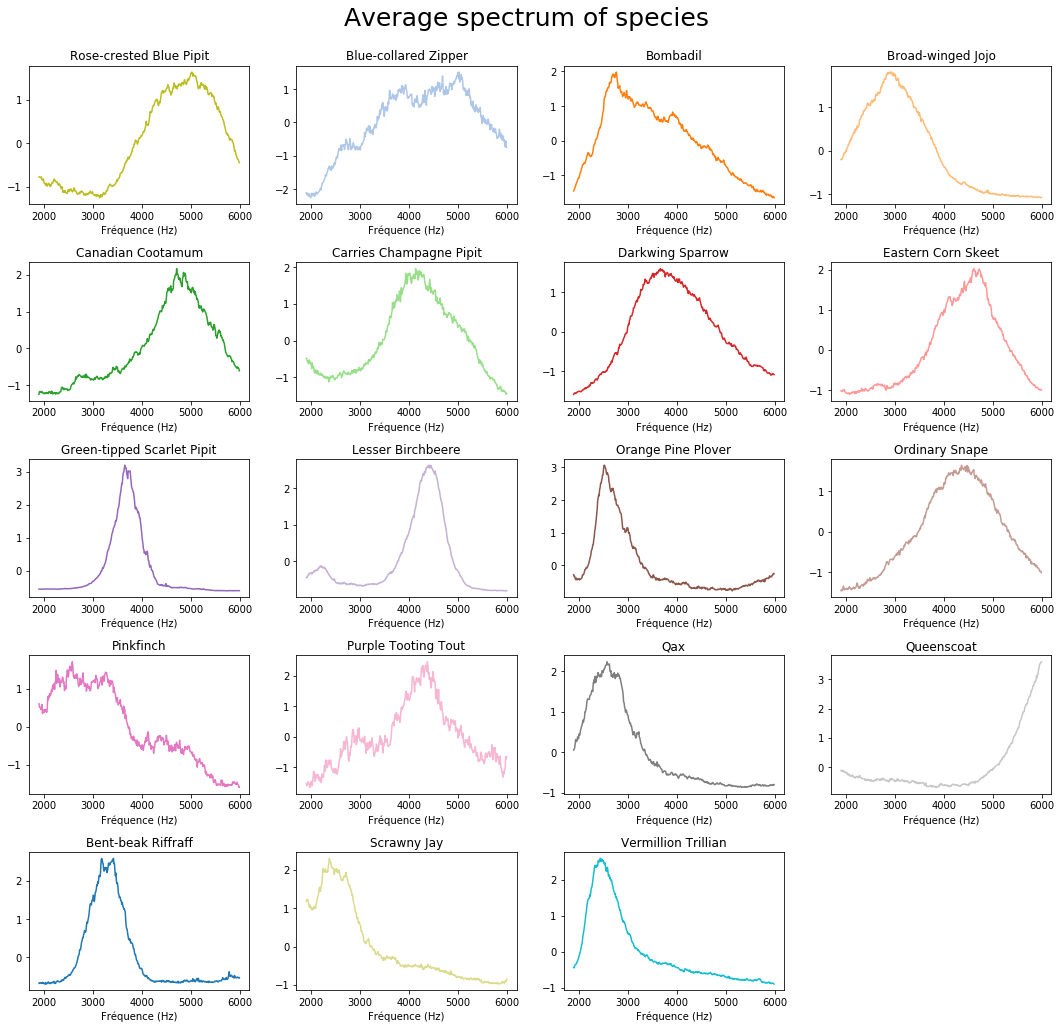

In [7]:
species = df_all.English_name.unique()
plt.figure(figsize=(15,15))
plt.suptitle('Average spectrum of species', fontsize=25)
for i, specie in enumerate(species):
    plt.subplot(5,4,i+1)
    plot_species(specie, X, df_all)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<div class="alert alert-info">
You can see that frequencies are mainly between 3500Hz and 6000Hz for the Blue Pipit, with also some at 2000Hz.

Sometimes you get some aberation due to bad noise filtration.
</div>

### Random Blue Pipit spectrums
#### For the "songs"

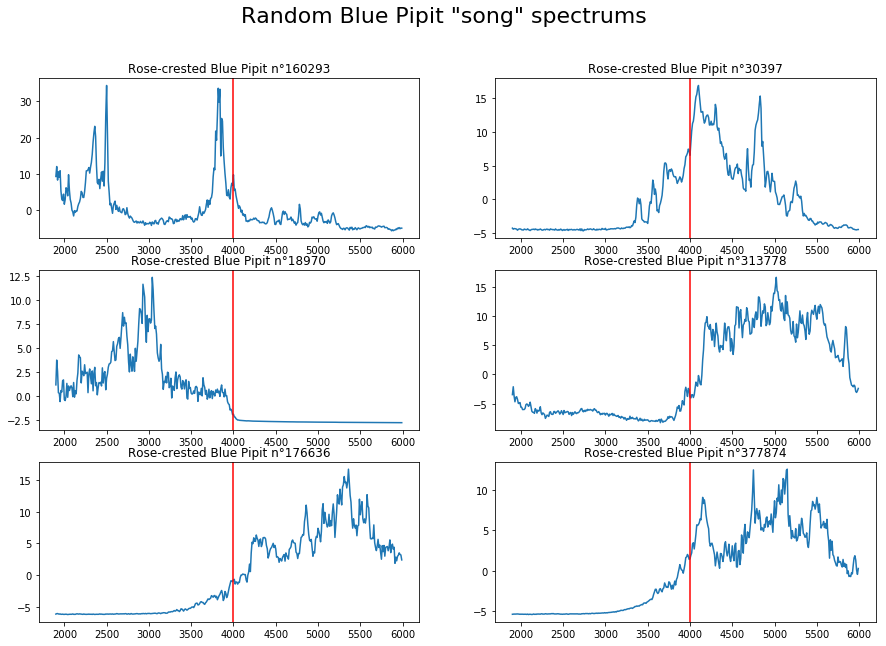

In [8]:
N = 6
X_blue = X.loc[(df_all.English_name == "Rose-crested Blue Pipit") 
               & (df_all['Vocalization_type'] == 'song')].sample(N)
df_blue = df_all.loc[X_blue.index]

flim = 4000

plt.figure(figsize=(15,10))
plt.suptitle('Random Blue Pipit "song" spectrums', fontsize=22)

for i in range(N):
    obs = df_blue.iloc[i]
    plt.subplot(3, 2, i+1)
    plt.plot(X_blue.iloc[i])
    plt.axvline(flim, color="red")
    plt.title("{} n°{}".format(obs.English_name, obs.name))
plt.show()

#### For the "calls"

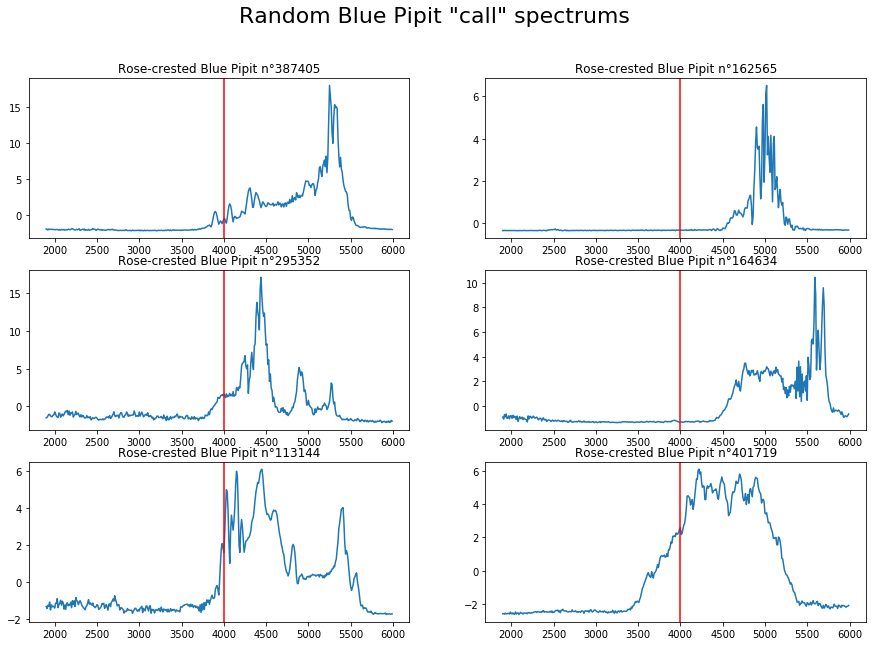

In [9]:
N = 6
X_blue = X.loc[(df_all.English_name == "Rose-crested Blue Pipit") 
               & (df_all['Vocalization_type'] == 'call')].sample(N)
df_blue = df_all.loc[X_blue.index]

flim = 4000

plt.figure(figsize=(15,10))
plt.suptitle('Random Blue Pipit "call" spectrums', fontsize=22)

for i in range(N):
    obs = df_blue.iloc[i]
    plt.subplot(3, 2, i+1)
    plt.plot(X_blue.iloc[i])
    plt.axvline(flim, color="red")
    plt.title("{} n°{}".format(obs.English_name, obs.name))
plt.show()

## Kasios files

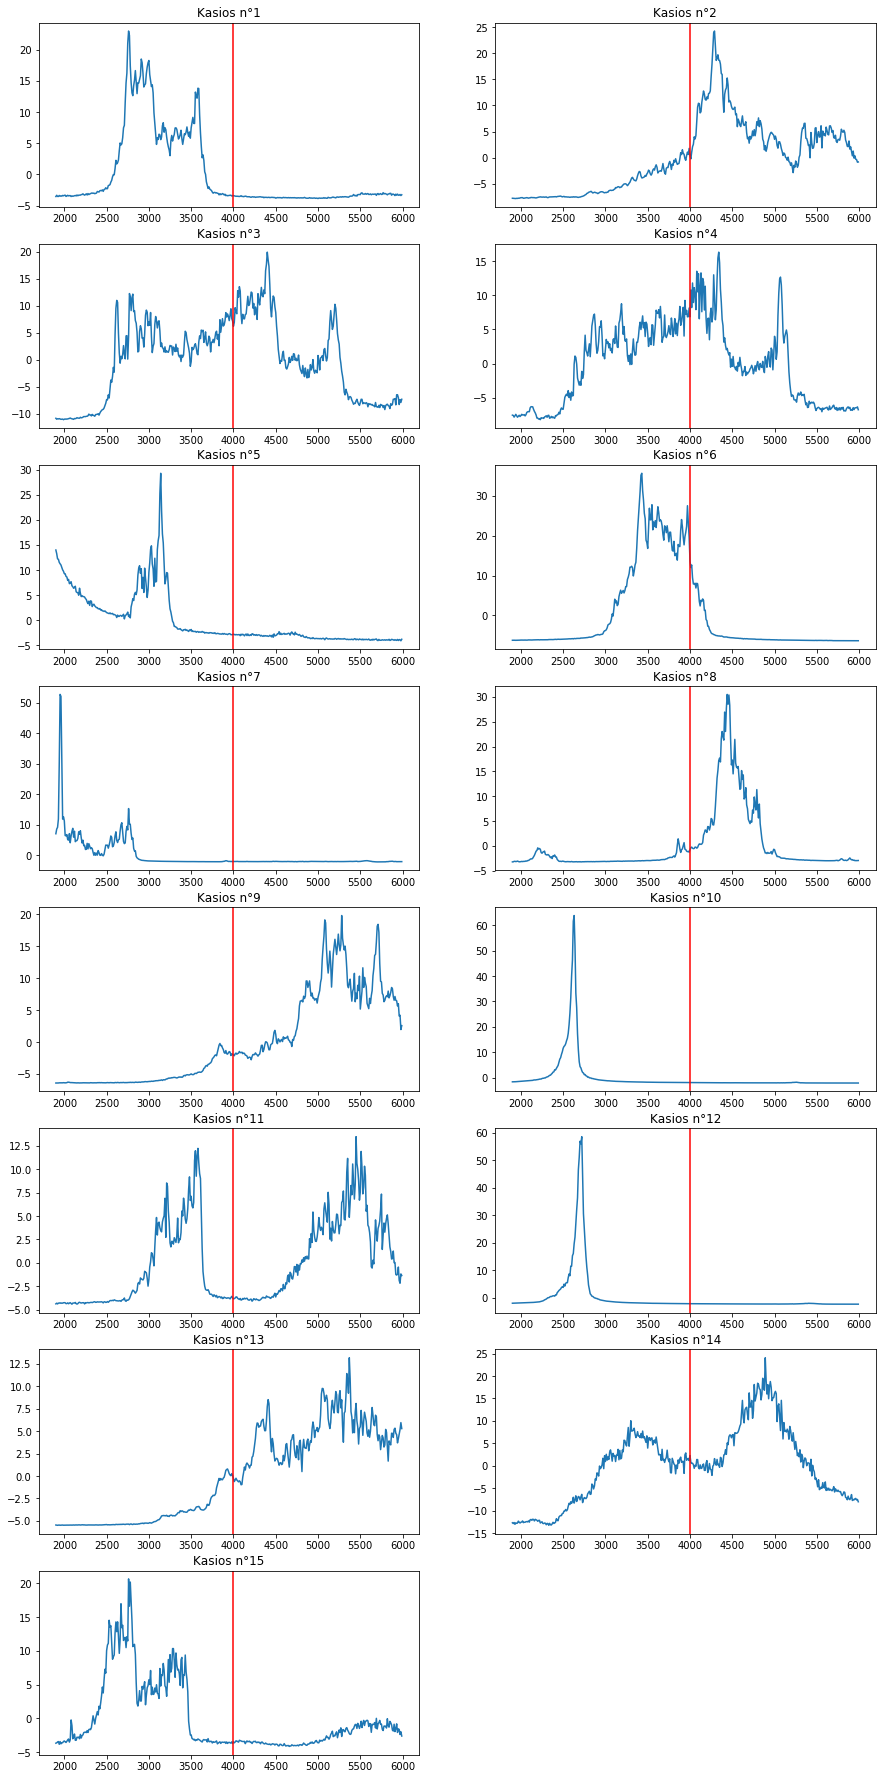

In [10]:
plt.figure(figsize=(15,40))
for i in range(X_kasios.shape[0]):
    plt.subplot(10,2,i+1)
    plt.plot(X_kasios.iloc[i])
    plt.title("Kasios n°{}".format(i+1))
    plt.axvline(flim, color="red")
plt.show()

<div class="alert alert-info">
You can see that some Kasios file does not contains the Blue Pipit frequencies and even contains foreign frequencies for this species. Then, you can eliminate 1, 3, 4, 5, 6, 7, 10, 11, 12, 14 and 15 that contains foreign frequencies.

<b>The Blue Pipit must be within 2, 8, 9 and 13</b>. We might also include 11 and 14. 
</div>

## Analyse a specific file

In [11]:
obs_id = 160293
obs = df_all.loc[obs_id]
f = File(obs.song)

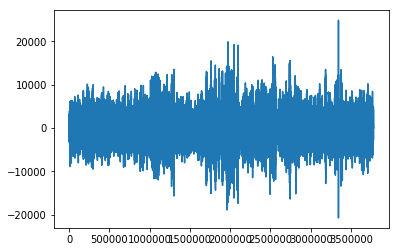

In [12]:
plt.plot(f.data)

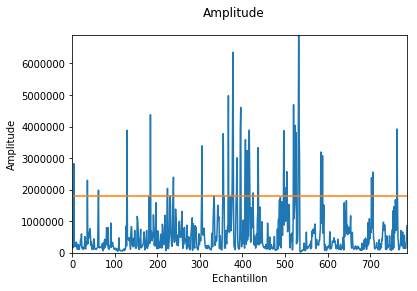

In [13]:
f.plotAmp()

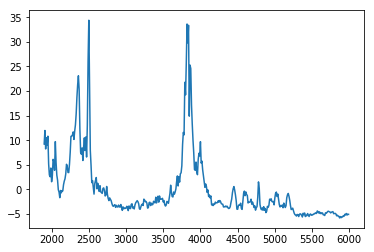

In [14]:
spectre, freq = f.getNormalizedSpectre()
plt.plot(freq, spectre)